## REGRESSION ALGORITHMS IN SUPERVISED LEARNING

* Linear Regression
* Logistic Regression
* Lasso Regression
* Non-Linear Regression
* Regression Trees
* Bayesian-Linear Regression
* Polynomial Regression  
* Ridge Regression
* Linear Discriminant Analysis

## LINEAR REGRESSION

* Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.

* In Linear Regression , There are 2 types :- 1. Simple Linear Regression , 2. Multiple Linear Regression

* We have to find the best fit line . For this, We have to find slope and constant with R-Square Method.

## 1.SIMPLE LINEAR REGRESSION

In [687]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.linear_model as LinearRegression

In [688]:
data = pd.read_csv(r"C:\Users\91891\Downloads\archive (6)\1.01. Simple linear regression.csv", usecols = ['SAT', 'GPA'], sep = ',')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [689]:
data.isna().sum()

SAT    0
GPA    0
dtype: int64

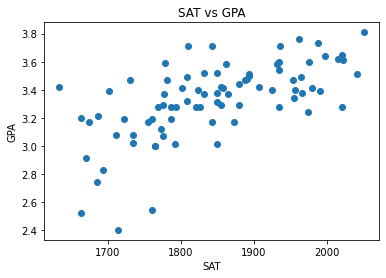

In [897]:
plt.scatter(data.SAT, data.GPA)
plt.title('SAT vs GPA')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

x = data['SAT'].values
y = data['GPA'].values

In [898]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import numpy as np

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)
#x_train = x[:-30]
#x_test  = x[-30:]

#y_train = y[:-30]
#y_test  = y[-30:]

x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [899]:
print('coeff :',lr.coef_ ," " ,'intercept :', lr.intercept_)

coeff : [0.00157377]   intercept : 0.44357460445431895


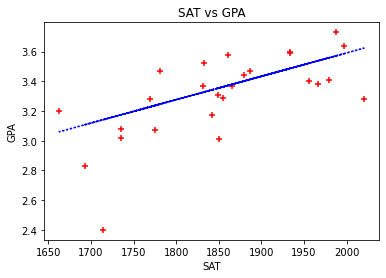

In [901]:
y_pred = lr.predict(x_test)

plt.scatter(x_test, y_test, color = 'r', marker = '+')
plt.plot(x_test,y_pred, color = 'b', linestyle = 'dotted')
plt.title('SAT vs GPA')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [694]:
# y = m*x + c 
0.00157377 * 1714 + 0.44357460445431895

3.141016384454319

In [695]:
lr.predict([[1714]])

array([3.14102329])

In [697]:
from sklearn.metrics import r2_score      
from sklearn.metrics import mean_squared_error as mse
print(r2_score(y_test, y_pred) * 100 )      # R-Squared Score Through R-Square Method
print(mse(y_test, y_pred))   # how close to a regression line close to datapoints
print(lr.score(x_train,y_train) * 100)
print(lr.score(x_test,y_test) * 100)

39.52862626587854
0.04742896867633866
39.991007497422174
39.52862626587854


## MULTIPLE LINEAR REGRESSION  ( POLYNOMIAL REGRESSION)

In [434]:
data1 = pd.read_csv(r"C:\Users\91891\Downloads\archive (5)\kc_house_data.csv")
data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [437]:
# data1.shape
data1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [710]:
x1 = data1.drop(['id','date','lat','long','view'], axis = 1)
y1 = data1['price']

In [711]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.30, random_state = 10)

sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test  = sc.fit_transform(x1_test)

In [712]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [713]:
y1_pred = lr.predict(x1_test)
print(r2_score(y1_test, y1_pred))   # We get Very Decent Score
print(lr.score(x1_train,y1_train) * 100)
print(lr.score(x1_test,y1_test) * 100)

0.9996552866451428
100.0
99.96552866451428


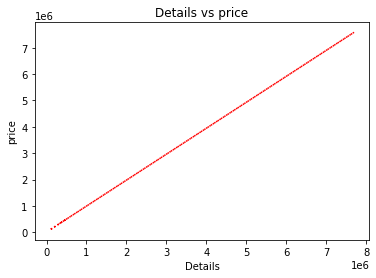

In [467]:
plt.plot(y1_test,y1_pred, color = 'r', linestyle = 'dotted')
plt.title('Details vs price')
plt.xlabel('Details')
plt.ylabel('price')
plt.show()
# Straight line shows that our model is accurate

## LOGISTIC REGRESSION

* It is used for predicting the categorical dependent variable using a given set of independent variables.
* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
* It uses logistic/sigmoid function for determining probabilities , and it uses threshold value.

In [598]:
data3 = pd.read_csv(r"C:\Users\91891\Downloads\framingham.csv")
data3

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [599]:
data3.isna().sum()   # there are null values in data , we have to fill it with mean.

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [600]:
import warnings
warnings.filterwarnings('ignore')
mean = data3.mean()
mean

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [601]:
data3 = data3.fillna(mean)   # Filling with Mean

In [602]:
data3.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [603]:
X3 = data3.iloc[:, :-1] # X has all columns except the last column because it is the column we have to make predictions for.
y3 = data3.iloc[:, -1]  # y has last column

X3 = np.array(X3)
y3 = np.array(y3)


In [604]:
from sklearn.preprocessing import StandardScaler

X3 = StandardScaler().fit_transform(X3)

In [605]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=False)

In [606]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(X3_train,y3_train)

LogisticRegression()

In [610]:
y3_pred = lor.predict(X3_test)

lor.score(X3_test,y3_test)

0.8537735849056604

In [617]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy_score(y3_pred,y3_test)

0.8537735849056604

In [619]:
confusion_matrix(y3_pred,y3_test)

array([[714, 117],
       [  7,  10]], dtype=int64)

In [622]:
724/848   # accuracy verification diagnal sum / total sum

0.8537735849056604

In [644]:
y3_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [661]:
# Predicting With Input data

ft = np.array([[1,39,4,0,0,0,0,0,0,195,106,70,27,80,70]])

prediction = lor.predict(ft)
print("Prediction: {}".format(ft1))

Prediction: [1]


## LASSO REGRESSION

* LASSO (Least Absolute Shrinkage and Selection Operator)
* LASSO is used if the model is over fitting (If we get lower r2 or accuracy values )
* LASSO uses L1-Regularization.
* LASSO = MSE(Mean Sqaured Error + Absolute Values of theta)
* LASSO Parameters - alpha ( Alpha, the constant that multiplies the L1 term, is the tuning parameter that decides how much we want to penalize the model. The default value is 1.0.)
* There are 3 types in fitting :- 1. Over Fitting , 2. Under Fitting  3. Balanced Fitting
* Fitting should be balanced , it can be done with L1 and L2 Regularization.

In [850]:
# We Will take above dataset which we used for simple linear regression
from sklearn.linear_model import Lasso

ls = Lasso(alpha = 1, max_iter = 100) # alpha 0 is same as linear regression
ls.fit(x_train,y_train)

Lasso(alpha=1, max_iter=100)

In [851]:
y_pred = ls.predict(x_test)

In [852]:
y_pred

array([3.47907914, 3.1523198 , 3.25183287, 3.07657104, 3.18351046,
       3.47759387, 3.18351046, 3.34243432, 3.12112913, 3.32758162,
       3.37659553, 3.51175507, 3.35283121, 3.55779843, 3.40927146,
       3.3973893 , 3.36174283, 3.57265113, 3.52660777, 3.54591627,
       3.24292125, 3.23400963, 3.32609635, 3.60681233, 3.35431648,
       3.37065445])

In [853]:
ls.score(x_train,y_train)

0.39864532018684407

In [854]:
ls.score(x_test,y_test)

0.38832803011758865

## RIDGE REGRESSION

* Ridge regression or Tikhonov regularization is the regularization technique that performs L2 regularization.
*  It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the square of the magnitude of coefficients.
* Ridge = MSE + Summation Squared theta value.
* This is also used for to avoid over fitting

In [890]:
# We can take same dataset which we taken above

from sklearn.linear_model import Ridge

rd = Ridge(alpha = 10, max_iter = 100)

In [891]:
rd.fit(x_train,y_train)

Ridge(alpha=10, max_iter=100)

In [892]:
y_pred = rd.predict(x_test)

In [893]:
y_pred

array([3.48725136, 3.14102636, 3.24646761, 3.06076511, 3.17407511,
       3.48567761, 3.17407511, 3.34246636, 3.10797761, 3.32672886,
       3.37866261, 3.52187386, 3.35348261, 3.57066011, 3.41328511,
       3.40069511, 3.36292511, 3.58639761, 3.53761136, 3.55807011,
       3.23702511, 3.22758261, 3.32515511, 3.62259386, 3.35505636,
       3.37236761])

In [894]:
rd.score(x_train,y_train)

0.39991007488110597

In [895]:
rd.score(x_test,y_test)

0.39528463792911184

## NON-LINEAR REGRESSION

In [978]:
df = pd.read_csv(r"C:\Users\91891\Downloads\archive (7)\china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


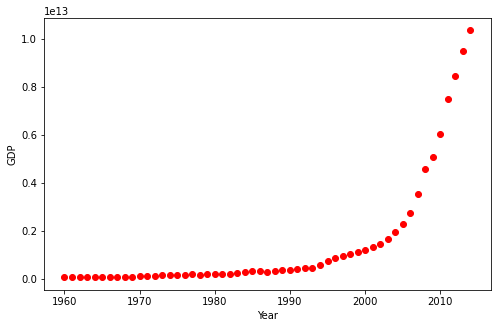

In [992]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')  # ro - red dotted
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

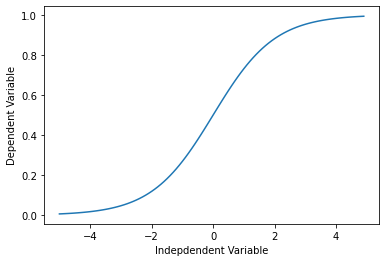

In [980]:
# After Looking Intial Value in Graph , Let us assume that Logistic Graph will be Good Approximation.

# This is the Sample Logistic Model
X = np.arange(-5, 5, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

* Logistic Function :- Y = 1 / 1 + exp** B1(X-B2)  Since , B1 & B2 are betas
* B1 : Control Curve Steepness (Steepness : Difficult to go up in curves)
* B2 : Slides the Curve on x-axis.

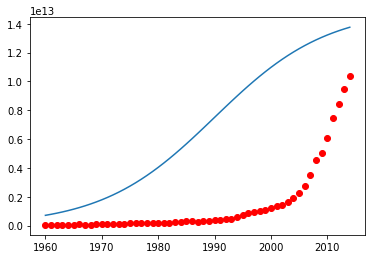

In [998]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1990.0  # At 1990 Curve gone up (slide point approx)

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [982]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [983]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


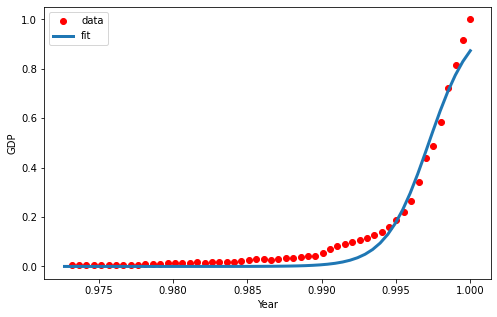

In [984]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [991]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]


# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.90


## BAYESIAN REGRESSION

* For to calculate unequal distribution data it provides natural mechanism.
* It is similar to Bayes theorem.
* It Works Efficiently with the small size of the dataset.
* It is very powerful and tested approach.

In [1003]:
# We have taken linear regression dataset
from sklearn.linear_model import BayesianRidge 
br = BayesianRidge()

In [1004]:
br.fit(x_train,y_train)

BayesianRidge()

In [1005]:
model_pred = br.predict(x_test)

In [1006]:
r2_score(y_test,model_pred)

0.39369239971137737

## REGRESSION TREES

* A Regression tree is basically a decision tree that is used in regression tasks.
* It Uses Mean Squared Error.
* Regression Tree is used for price of newly launched product bcz, price can be anything depending on various constraints.
* For Better Visualization for users.
* Regression Tree also uses CART algorithm.

In [1019]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [1020]:
boston = datasets.load_boston() # inbuilt scikit dataset
df1 = pd.DataFrame(boston.data)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [1021]:
df1.columns = boston.feature_names
df1['MEDV'] = boston.target

In [1022]:
df1.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [1023]:
x7 = df1.drop(['MEDV'], axis = 1).values
y7 = df1['MEDV'].values

In [1024]:
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.3)

In [1027]:
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5) # Splitting Criterion Mean Square Error
rt.fit(x7_train,y7_train)

DecisionTreeRegressor(max_depth=5)

In [1030]:
y7_pred = rt.predict(x7_test)

In [1033]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y7_test, y7_pred))

Mean Absolute Error: 3.973917292389301


In [1035]:
print('Mean Squared Error:', metrics.mean_squared_error(y7_test, y7_pred)) # Overall instances in test set

Mean Squared Error: 34.8738051438998


In [1036]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)))

Root Mean Squared Error: 5.905404740058026


In [1037]:
print('R Squared Score is:', r2_score(y7_test, y7_pred))

R Squared Score is: 0.6405664850235918


## GRID SEARCH CV

* It is used for to improve our train and test score

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_jobs' : [-1]}

lr = GridSearchCV(lr, parameters)

lr.fit(x_train,y_train)

print(lr1.score(x_train,y_train))

## LINEAR DISCRIMINANT ANALYSIS

* Used For Face Recognition
* It is one of the supervised classification algotithm
* You can Read about it in Online more...

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
x1_train = lda.fit_transform(x1_train, y1_train)
x1_test = lda.transform(x1_test)
  
# plot the scatterplot
plt.scatter(
    x1_train[:,0],x1_train[:,1],c=y1_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)